In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

In [2]:
df = pd.read_pickle('Datos_sensores.pkl')

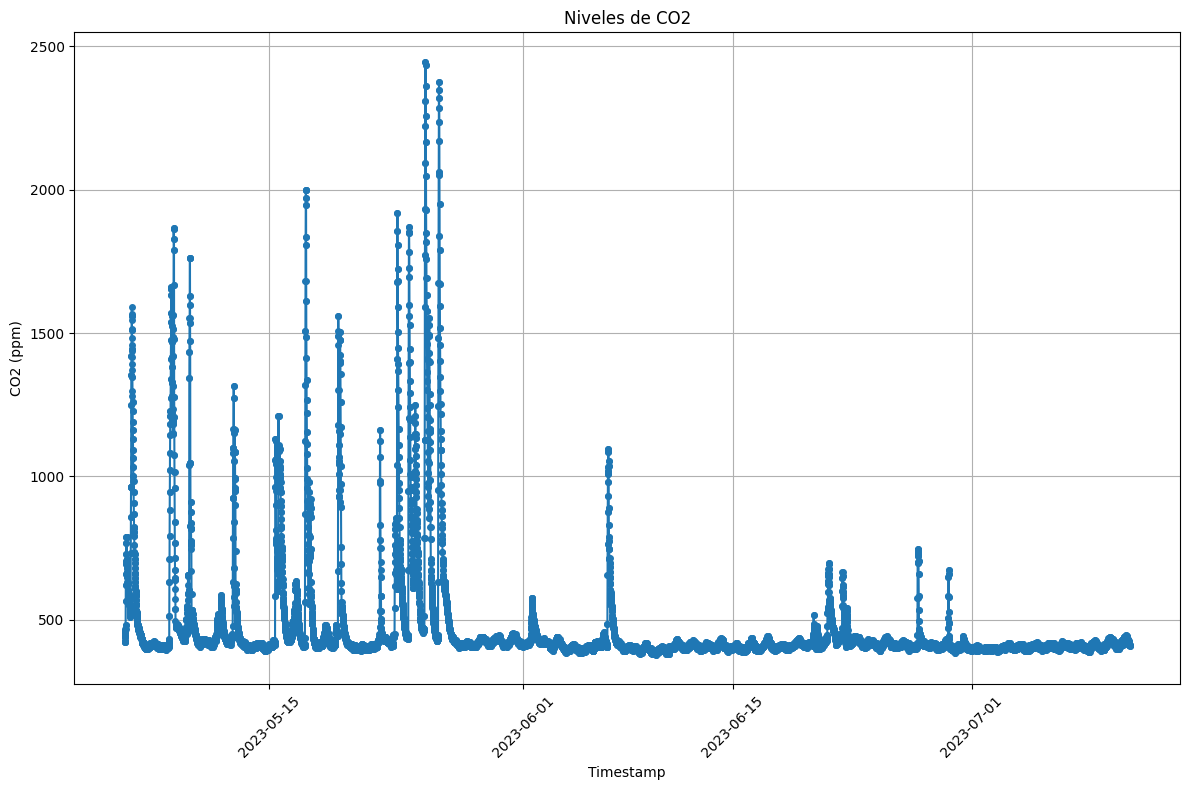

In [3]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Graficar el CO2 vs. Timestamp con líneas y marcadores
plt.plot(df['Timestamp'], df['CO2'], linestyle='-', marker='o', markersize=4)

# Configurar el eje x para que muestre las fechas
plt.xticks(rotation=45)

# Etiquetas de los ejes
plt.xlabel('Timestamp')
plt.ylabel('CO2 (ppm)')

# Título del gráfico
plt.title('Niveles de CO2')

# Mostrar una cuadrícula en el gráfico
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [4]:
# Filtramos el dataframe para que solo contenga los datos de mayo
df_may = df[df['Timestamp'].dt.month == 5]

# Seleccionamos solo las columnas de interés y creamos un nuevo dataframe
df_may_subset = df_may[['Timestamp', 'CO2', 'Ocupacion']].copy() # Usar .copy() para evitar SettingWithCopyWarning

# Creamos una nueva columna 'hour' con la hora de cada timestamp
df_may_subset.loc[:, 'hour'] = df_may_subset['Timestamp'].dt.hour

# Agrupamos por hora y calculamos la media
df_hourly_mean_may = df_may_subset.groupby('hour').mean().reset_index()

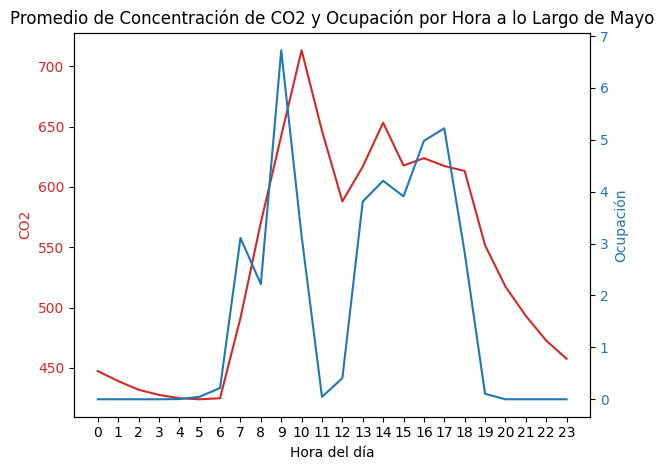

In [5]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('CO2', color=color)
ax1.plot(df_hourly_mean_may['hour'], df_hourly_mean_may['CO2'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(24))

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Ocupación', color=color)
ax2.plot(df_hourly_mean_may['hour'], df_hourly_mean_may['Ocupacion'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Promedio de Concentración de CO2 y Ocupación por Hora a lo Largo de Mayo')
fig.tight_layout()
plt.show()

In [6]:
# Filtramos el dataframe para que solo contenga los datos del 24 de mayo
df_24_may = df[(df['Timestamp'].dt.day == 24) & (df['Timestamp'].dt.month == 5)]

# Seleccionamos solo las columnas de interés y creamos un nuevo dataframe
df_24_may_subset = df_24_may[['Timestamp', 'CO2', 'Ocupacion']].copy() # Usar .copy() para evitar SettingWithCopyWarning

# Creamos una nueva columna 'hour' con la hora de cada timestamp
df_24_may_subset.loc[:, 'hour'] = df_24_may_subset['Timestamp'].dt.hour

# Agrupamos por hora y calculamos la media
df_hourly_mean_24_may = df_24_may_subset.groupby('hour').mean().reset_index()

In [7]:
df_hourly_mean_24_may

,hour,Timestamp,CO2,Ocupacion
0,0,2023-05-24 00:27:30,483.833333,0.000000
1,1,2023-05-24 01:27:30,466.000000,0.000000
2,2,2023-05-24 02:27:30,453.500000,0.000000
3,3,2023-05-24 03:27:30,446.833333,0.000000
4,4,2023-05-24 04:27:30,439.666667,0.000000
5,5,2023-05-24 05:27:30,439.500000,0.166667
6,6,2023-05-24 06:27:30,437.000000,0.250000
7,7,2023-05-24 07:27:30,1038.333333,30.750000
8,8,2023-05-24 08:27:30,1795.666667,14.333333
9,9,2023-05-24 09:27:30,1432.666667,0.666667


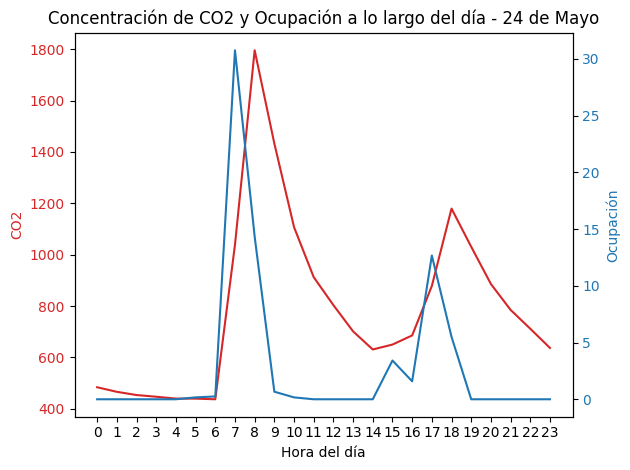

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('CO2', color=color)
ax1.plot(df_hourly_mean_24_may['hour'], df_hourly_mean_24_may['CO2'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(24))

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Ocupación', color=color)
ax2.plot(df_hourly_mean_24_may['hour'], df_hourly_mean_24_may['Ocupacion'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Concentración de CO2 y Ocupación a lo largo del día - 24 de Mayo')

fig.tight_layout()
plt.show()

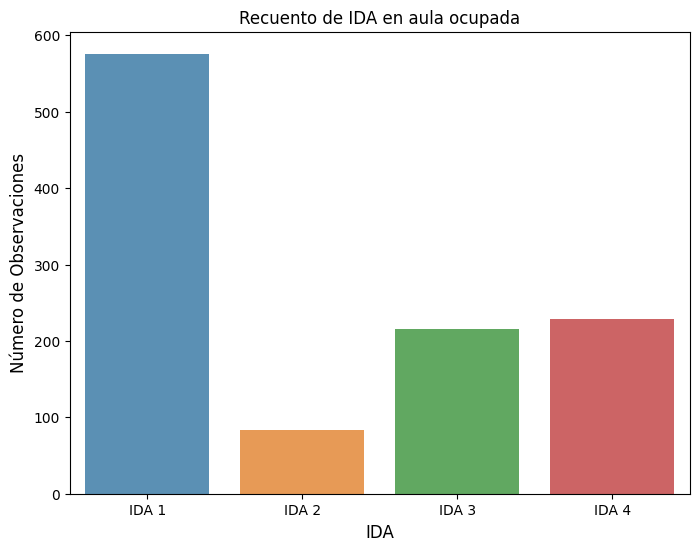

In [9]:
# Crear un dataframe solo con las observaciones cuando el aula está ocupada
df_occupied = df[df['Ocupacion'] > 0].copy()  # Usar .copy() para evitar SettingWithCopyWarning

# Ordenar el DataFrame por el campo 'IDA'
ida_order = ['IDA 1', 'IDA 2', 'IDA 3', 'IDA 4']
df_occupied.loc[:, 'IDA'] = pd.Categorical(df_occupied['IDA'], categories=ida_order, ordered=True)
df_occupied.sort_values('IDA', inplace=True)

# Calcular el recuento de cada IDA
ida_count = df_occupied['IDA'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=ida_count.index, y=ida_count.values, alpha=0.8, order=ida_order)

plt.title('Recuento de IDA en aula ocupada')
plt.ylabel('Número de Observaciones', fontsize=12)
plt.xlabel('IDA', fontsize=12)
plt.show()

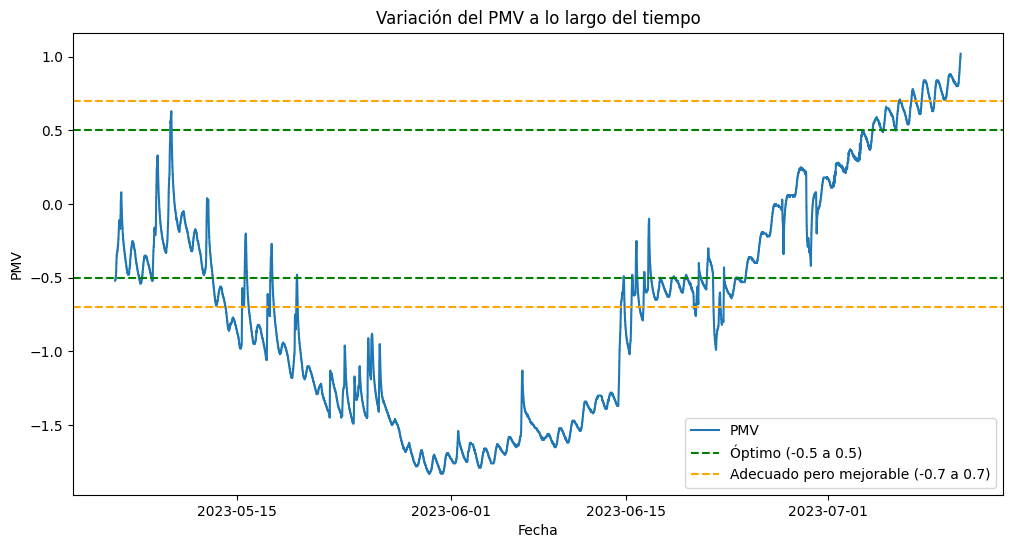

In [10]:
df.set_index('Timestamp', inplace=True)

# Creación del gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['pmv'], label='PMV')
plt.axhline(y=-0.5, color='g', linestyle='--', label='Óptimo (-0.5 a 0.5)')
plt.axhline(y=0.5, color='g', linestyle='--')
plt.axhline(y=-0.7, color='orange', linestyle='--', label='Adecuado pero mejorable (-0.7 a 0.7)')
plt.axhline(y=0.7, color='orange', linestyle='--')
plt.title('Variación del PMV a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('PMV')
plt.legend()
plt.show()

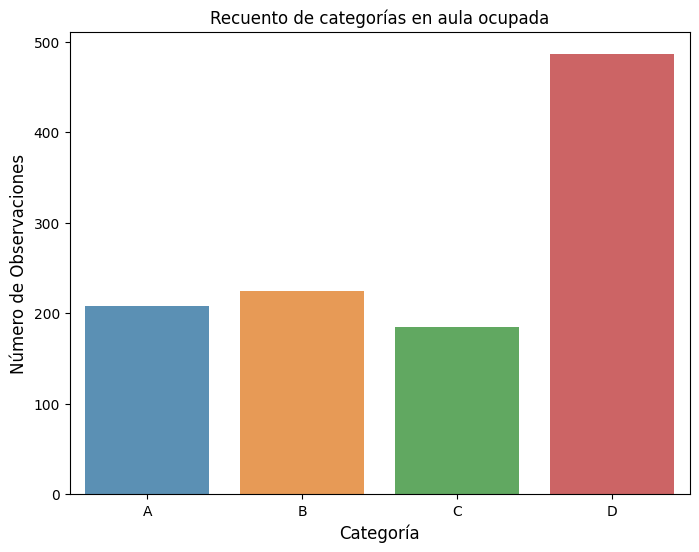

In [11]:
# Filtramos el dataframe para que solo contenga las observaciones cuando el aula está ocupada
df_ocupada = df[df['Ocupacion'] > 0]

# Calcular el recuento de cada categoría
categoria_count_ocupada = df_ocupada['Categoria'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=categoria_count_ocupada.index, y=categoria_count_ocupada.values, alpha=0.8)

plt.title('Recuento de categorías en aula ocupada')
plt.ylabel('Número de Observaciones', fontsize=12)
plt.xlabel('Categoría', fontsize=12)
plt.show()

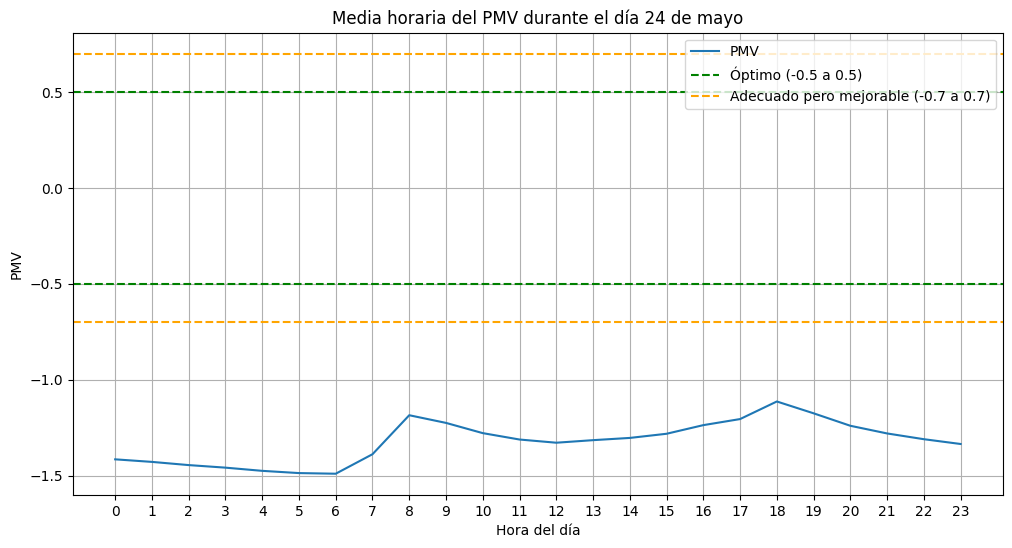

In [12]:
# Filtramos el dataframe para que solo contenga los datos del 24 de mayo
df_24_may = df[(df.index.day == 24) & (df.index.month == 5)]

# Seleccionamos solo la columna de interés y creamos un nuevo dataframe
df_24_may_subset = df_24_may[['pmv']].copy() # Usar .copy() para evitar SettingWithCopyWarning

# Agrupamos por hora y calculamos la media
df_24_may_subset.loc[:, 'hour'] = df_24_may_subset.index.hour
df_hourly_mean_24_may = df_24_may_subset.groupby('hour').mean().reset_index()

# Creación del gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_hourly_mean_24_may['hour'], df_hourly_mean_24_may['pmv'], label='PMV')
plt.axhline(y=-0.5, color='g', linestyle='--', label='Óptimo (-0.5 a 0.5)')
plt.axhline(y=0.5, color='g', linestyle='--')
plt.axhline(y=-0.7, color='orange', linestyle='--', label='Adecuado pero mejorable (-0.7 a 0.7)')
plt.axhline(y=0.7, color='orange', linestyle='--')
plt.title('Media horaria del PMV durante el día 24 de mayo')
plt.xlabel('Hora del día')
plt.ylabel('PMV')
plt.xticks(range(24))  # Mostrar todas las horas en el eje X
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

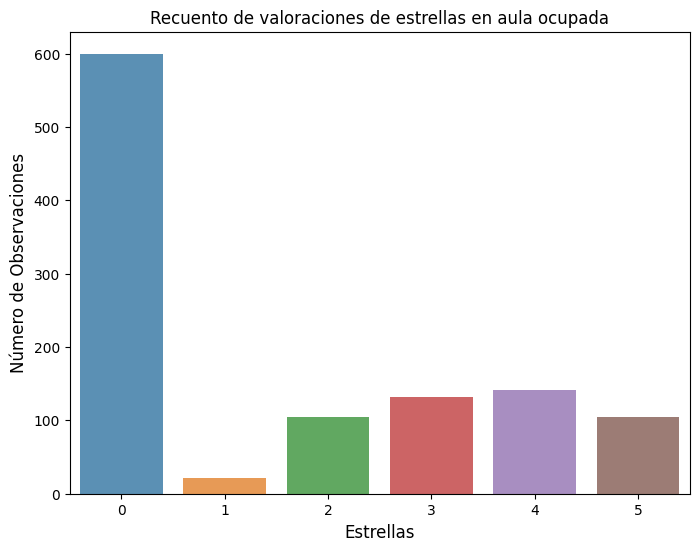

In [13]:
# Filtramos el dataframe para que solo contenga las observaciones cuando el aula está ocupada
df_copia_ocupada = df[df['Ocupacion'] > 0]

# Calcular el recuento de cada valor de estrellas
estrellas_count_ocupada = df_copia_ocupada['Estrellas'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=estrellas_count_ocupada.index, y=estrellas_count_ocupada.values, alpha=0.8)

plt.title('Recuento de valoraciones de estrellas en aula ocupada')
plt.ylabel('Número de Observaciones', fontsize=12)
plt.xlabel('Estrellas', fontsize=12)
plt.show()